In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import os
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
folder_path = "./img"

In [2]:
# we read the data
df = pd.read_csv('WALreply - Staubsauger.csv')
len(df)

60

In [3]:
dfbag = pd.read_csv('WALreply - Rucksack.csv')
len(dfbag)

60

In [4]:
dfsum = pd.read_csv('WALreply - staub+rucksack.csv')
dfboth = pd.read_csv('WALreply - sum.csv')
dfboth

,Alter,Geschlecht,Wohnort,Wie oft kaufen,Wie wichtig Produktrezensionen,evaluation,Bewertung,Produkt
0,28,M,Deutschland,5,4,2,positive,Staubsauger
1,26,M,Deutschland,4,4,3,positive,Staubsauger
2,27,W,Deutschland,5,5,2,positive,Staubsauger
3,34,M,China,3,4,6,positive,Staubsauger
4,23,W,China,3,4,1,positive,Staubsauger
...,...,...,...,...,...,...,...,...
115,23,M,Deutschland,4,2,-2,negative,Rucksack
116,26,W,Deutschland,4,1,-3,negative,Rucksack
117,24,M,Deutschland,1,1,0,negative,Rucksack
118,30,W,China,1,1,0,negative,Rucksack


In [5]:
# dfinfo = pd.read_csv('WALreply - info.csv')
# dfinfo

# Visualizing data

### 1. Wohnort und Kaufwahrscheinlichkeit

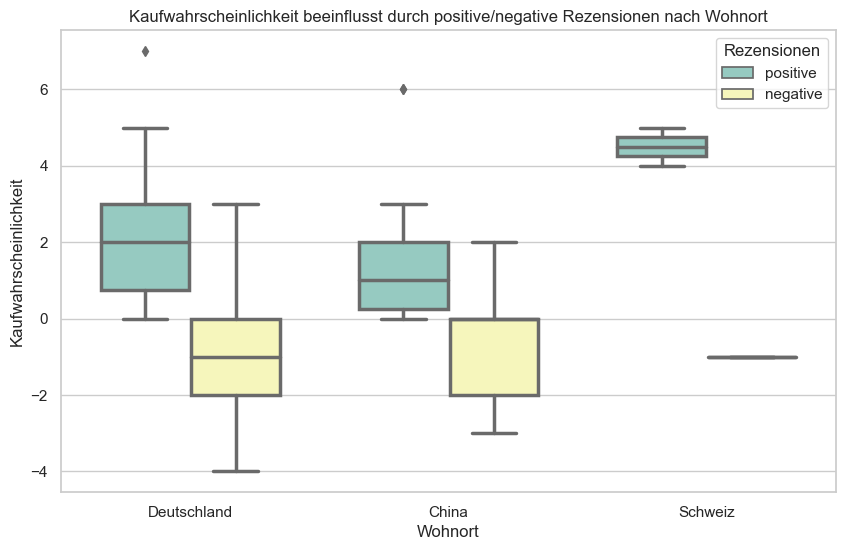

In [6]:
def nach_wohnort(title, file_path, dataset):
    # Use sns.boxplot to create a boxplot
    sns.set(style="whitegrid")  # Set the style of the plot
    
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    
    # Create a boxplot
    sns.boxplot(
        x='Wohnort', y='evaluation', data=dataset,
        hue='Bewertung', linewidth=2.5,
        width=0.7, dodge=True, palette="Set3"
    )

    # Set labels and title
    plt.xlabel('Wohnort')
    plt.ylabel('Kaufwahrscheinlichkeit')
    plt.title(title)

    # Show the legend
    plt.legend(title='Rezensionen')

    # Save the plot as an SVG file in the specified folder
    plt.savefig(file_path, format='svg')

    # Show the plot
    plt.show()

# Call the function with your DataFrame
title = 'Kaufwahrscheinlichkeit beeinflusst durch positive/negative Rezensionen nach Wohnort'
file_name = "Wohnort vs Kaufwahrscheinlichkeit.svg"
file_path = os.path.join(folder_path, file_name)

# Create the folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)
nach_wohnort(title, file_path, dfboth)

### 2. Geschlecht und Kaufwahrscheinlichkeit

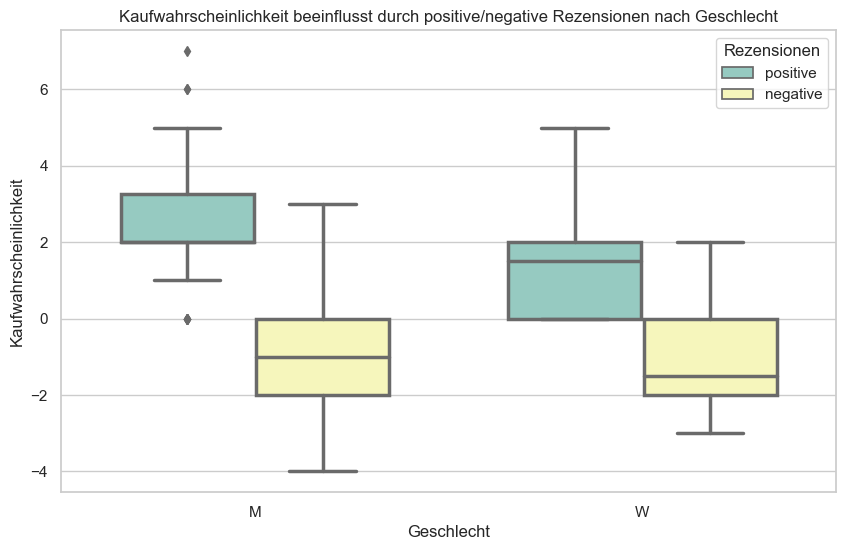

In [7]:
def nach_geschlecht(title, file_path, dataset):
    # Use sns.boxplot to create a boxplot
    sns.set(style="whitegrid")  # Set the style of the plot
    
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    
    # Create a boxplot
    sns.boxplot(
        x='Geschlecht', y='evaluation', data=dataset,
        hue='Bewertung', linewidth=2.5,
        width=0.7, dodge=True, palette="Set3"
    )

    # Set labels and title
    plt.xlabel('Geschlecht')
    plt.ylabel('Kaufwahrscheinlichkeit')
    plt.title(title)

    # Show the legend
    plt.legend(title='Rezensionen')

    # Save the plot as an SVG file in the specified folder
    plt.savefig(file_path, format='svg')

    # Show the plot
    plt.show()

# Call the function with your DataFrame
title = 'Kaufwahrscheinlichkeit beeinflusst durch positive/negative Rezensionen nach Geschlecht'
file_name = "Geschlecht vs Kaufwahrscheinlichkeit.svg"
file_path = os.path.join(folder_path, file_name)

# Create the folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)
nach_geschlecht(title, file_path,dfboth)

## 3. Alt vs. Kaufwahrscheinlichkeit

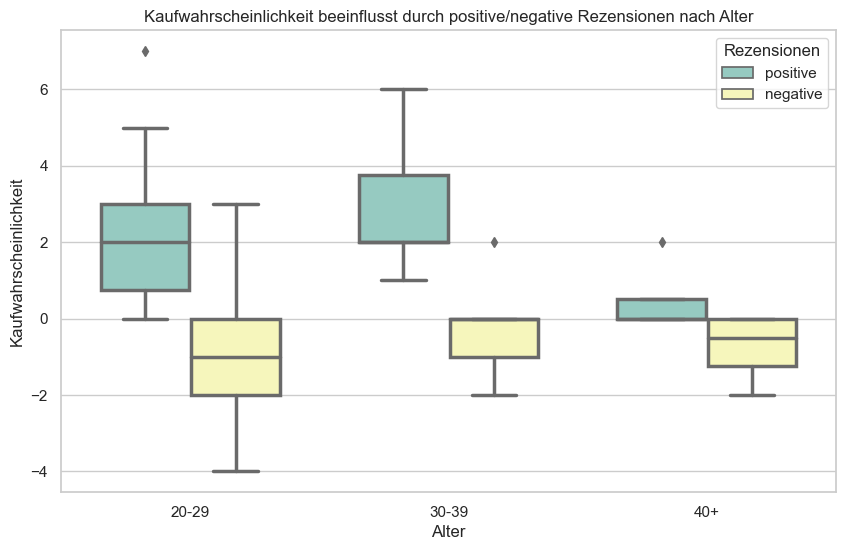

In [8]:
def nach_alter(title, file_path, dataset):
    # Create age groups based on the specified ranges
    dataset['Alter'] = pd.cut(dataset['Alter'], bins=[20, 30, 40, float('inf')], labels=['20-29', '30-39', '40+'], right=False)

    # Use sns.boxplot to create a boxplot
    sns.set(style="whitegrid")  # Set the style of the plot
    
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    
    # Create a boxplot
    sns.boxplot(
        x='Alter', y='evaluation', data=dataset,
        hue='Bewertung', linewidth=2.5,
        width=0.7, dodge=True, palette="Set3"
    )

    # Set labels and title
    plt.xlabel('Alter')
    plt.ylabel('Kaufwahrscheinlichkeit')
    plt.title(title)

    # Show the legend
    plt.legend(title='Rezensionen')

    # Save the plot as an SVG file in the specified folder
    plt.savefig(file_path, format='svg')

    # Show the plot
    plt.show()

# Call the function with your DataFrame
title = 'Kaufwahrscheinlichkeit beeinflusst durch positive/negative Rezensionen nach Alter'
file_name = "Alter_vs_Kaufwahrscheinlichkeit.svg"
file_path = os.path.join(folder_path, file_name)

# Create the folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)
nach_alter(title, file_path,dfboth)

## 4. Bewertung vs. Produkt vs. Kaufwahrscheinlichkeit

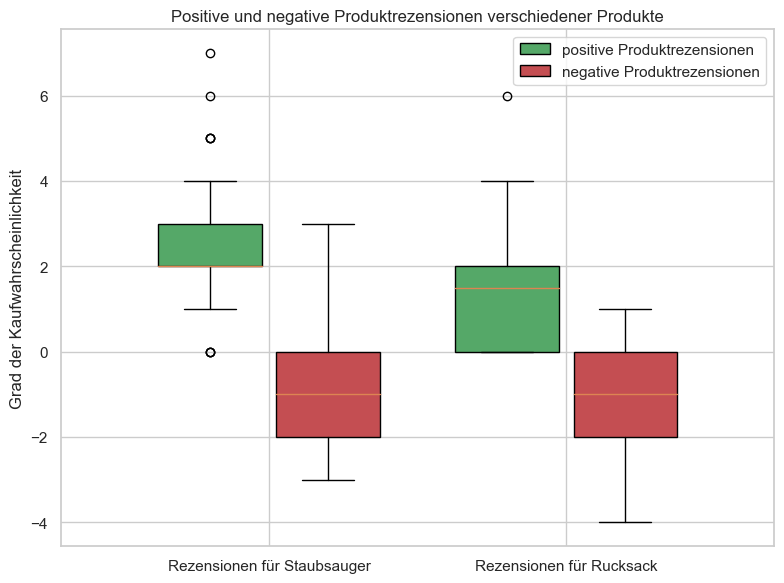

In [9]:
posStaub = dfsum["evaluation for positive Staubsauger"]
negStaub = dfsum["evaluation for negative Staubsauger"]
posRuck = dfsum["evaluation for positive Rucksack"]
negRuck = dfsum["evaluation for negative Rucksack"]

# Set the figure size to 11 inches in width
fig, ax = plt.subplots(figsize=(8, 6))

positions_a = [1 * 2 - 2.0]
positions_b = [1 * 2 - 1.6]
positions_c = [1 * 2 - 1]
positions_d = [1 * 2 - 0.6]

boxplots_a = ax.boxplot(posStaub, positions=positions_a, widths=0.35, patch_artist=True, boxprops=dict(facecolor="C2"))
boxplots_b = ax.boxplot(negStaub, positions=positions_b, widths=0.35, patch_artist=True, boxprops=dict(facecolor="C3"))
boxplots_c = ax.boxplot(posRuck, positions=positions_c, widths=0.35, patch_artist=True, boxprops=dict(facecolor="C2"))
boxplots_d = ax.boxplot(negRuck, positions=positions_d, widths=0.35, patch_artist=True, boxprops=dict(facecolor="C3"))

# Set x-axis tick positions and labels
ax.set_xticks([positions_a[0]+0.2, positions_c[0]+0.2])
ax.set_xticklabels(["Rezensionen für Staubsauger", "Rezensionen für Rucksack"])

# Set y-axis range from 0 to 5 with tick intervals of 1
# ax.set_yticks(range(6))
# ax.set_ylim(0, 5)

plt.legend([boxplots_a["boxes"][0], boxplots_b["boxes"][0]], ['positive Produktrezensionen', 'negative Produktrezensionen'], loc='upper right')
ax.set_ylabel('Grad der Kaufwahrscheinlichkeit')
ax.set_title('Positive und negative Produktrezensionen verschiedener Produkte')

file_name = "'Positive und negative Produktrezensionen vs Kaufwahrscheinlichkei.svg"
file_path = os.path.join(folder_path, file_name)

# Create the folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

# Save the plot as an SVG file in the specified folder
plt.savefig(file_path, format='svg')

# Adjust layout to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()

### Compare single staubsauger

In [10]:
# g = sns.relplot(x='Wohnort', y='evaluation', data=df, hue='negORpos',
#                 kind='line',errorbar=('ci', 55), markers=True,  err_style='bars',
#                 style='negORpos', linewidth = 2, markersize=10, err_kws={'elinewidth':4})
# g.set_ylabels('Grad der Kaufwahrscheinlichkeit')
# g.set_xlabels('Wohnort')
# g.set(title='Einzig Staubsauger')
# g.set(ylim = (-10, 10))

# Statistical analysis

In [5]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming 'df' is your DataFrame with 'evaluation' and 'negORpos' columns

# group1_scores = df[df['negORpos'] == 1]['evaluation']
# group2_scores = df[df['negORpos'] == -1]['evaluation']

# # Perform t-test
# t_statistic, p_value = ttest_ind(group1_scores, group2_scores)

In [6]:
# Einzig Staubsauger
t_statistic, p_value = ttest_ind(df['negORpos'], df['evaluation'])
# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("The difference in scores between negative or positive recension on Vacuum Cleaner is statistically significant.")
else:
    print("There is no significant difference in scores between recension.")

T-Statistic: -2.559813131784805
P-Value: 0.011735944324995947
The difference in scores between negative or positive recension on Vacuum Cleaner is statistically significant.


In [13]:
# Einzig Rucksack
t_statistic, p_value = ttest_ind(dfbag['negORpos'], dfbag['evaluation'])

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("The difference in scores between negative or positive recension on rucksacks is statistically significant.")
else:
    print("There is no significant difference in scores between recension.")

T-Statistic: -0.6112726163720098
P-Value: 0.542194916251281
There is no significant difference in scores between recension.


In [14]:
# Beide Staubsauger und Rucksack
dfboth['Bewertung_numeric'] = dfboth['Bewertung'].map({'positive': 1, 'negative': -1})

t_statistic, p_value = ttest_ind(dfboth['Bewertung_numeric'], dfboth['evaluation'])
# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("The difference in scores between negative or positive recension is statistically significant.")
else:
    print("There is no significant difference in scores between recension.")

T-Statistic: -2.2746237147005792
P-Value: 0.023819131836545288
The difference in scores between negative or positive recension is statistically significant.


Hypothese 1:
Positive Rezension haben eine positive Auswirkung auf das Kaufverhalten

In [18]:
dfhypo12 = pd.read_csv('WALreply - hypo12.csv')
dfhypo12

,original,evaluation for positiver recension,evaluation for negativer recension
0,4,5,3
1,3,4,3
2,4,5,2
3,1,4,1
4,4,4,1
5,4,4,1
6,1,3,1
7,3,3,1
8,2,2,2
9,1,1,1


In [19]:
t_statistic, p_value = ttest_ind(dfhypo12['original'], dfhypo12['evaluation for positiver recension'])
# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)


# Interpret the results
if p_value < 0.05:
    print("The difference in scores for positive recension is statistically significant.")
else:
    print("There is no significant difference in scores between recension.")

T-Statistic: -3.8781061067565905
P-Value: 0.00017367766069693326
The difference in scores for positive recension is statistically significant.


Hypothese 2:
Negative Rezensionen habe eine negative Auswirkung auf das Kaufverhalten

In [21]:
t_statistic, p_value = ttest_ind(dfhypo12['original'], dfhypo12['evaluation for negativer recension'])
# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)


# Interpret the results
if p_value < 0.05:
    print("The difference in scores for negative recension is statistically significant.")
else:
    print("There is no significant difference in scores between recension.")

T-Statistic: 5.362771700760845
P-Value: 4.1354651857670425e-07
The difference in scores for negative recension is statistically significant.


Hypothese 3:
Die Anzahl der Rezensionen haben einen Einfluss auf das Kaufverhalten

Hypothese 4:
Zu viele gute Rezensionen schrecken den Käufer ab.

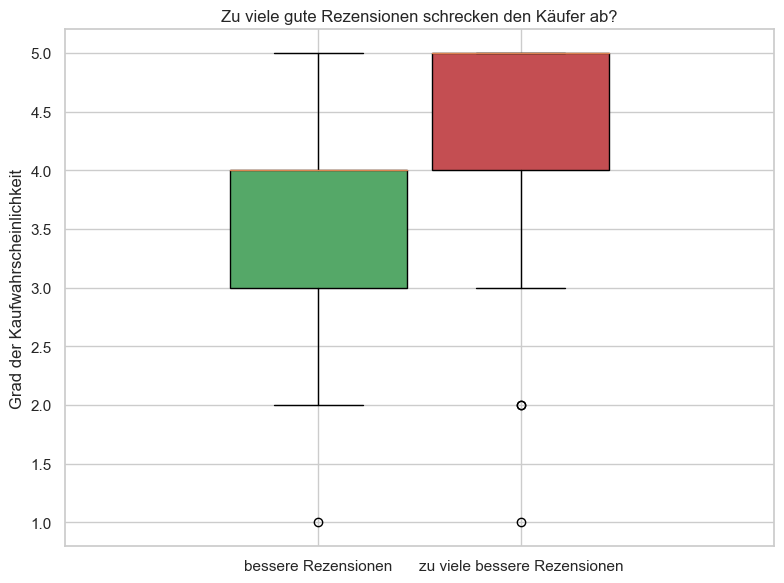

In [19]:
besserStaub = dfsum["besser Staubsauger"]
zuvielbesserStaub = dfsum["Zu viele gute Rezensionen"]

# Set the figure size to 11 inches in width
fig, ax = plt.subplots(figsize=(8, 6))

positions_a = [1 * 2 - 0.2]
positions_b = [1 * 2 + 0.2]

boxplots_a = ax.boxplot(besserStaub, positions=positions_a, widths=0.35, patch_artist=True, boxprops=dict(facecolor="C2"))
boxplots_b = ax.boxplot(zuvielbesserStaub, positions=positions_b, widths=0.35, patch_artist=True, boxprops=dict(facecolor="C3"))

# Set x-axis tick positions and labels
ax.set_xticks([positions_a[0], positions_b[0]])
ax.set_xticklabels(["bessere Rezensionen", "zu viele bessere Rezensionen"])

# Set y-axis range from 0 to 5 with tick intervals of 1
# ax.set_yticks(range(6))
# ax.set_ylim(0, 5)

# plt.legend([boxplots_a["boxes"][0], boxplots_b["boxes"][0]], ['positive Produktrezensionen', 'negative Produktrezensionen'], loc='upper right')
ax.set_ylabel('Grad der Kaufwahrscheinlichkeit')
ax.set_title('Zu viele gute Rezensionen schrecken den Käufer ab?')

# Call the function with your DataFrame
title = 'Zu viele gute Rezensionen schrecken den Käufer ab'
file_name = "Zu viele gute Rezensionen.svg"
file_path = os.path.join(folder_path, file_name)

# Create the folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

# Save the plot as an SVG file in the specified folder
plt.savefig(file_path, format='svg')

# Adjust layout to avoid label overlap
plt.tight_layout()

# Show the plot
plt.show()

### Ignore the rest：(ANOVA)

### ANOVA
If we want to compare the means of more than 2 groups, we need to perform an Analysis of Variance (ANOVA). The null-hypothesis in the ANOVA states that there is no difference between the means of the groups. A p-value less than 0.05 (at 95 %) rejects this general hypothesis without indicating which groups are different from one another.

In [20]:
import scipy
# for an ANOVA we need the python module statsmodels (statistical models)
import statsmodels.api as sm  

# the particular function we need is called ols()
# (ols: ordinary least squares, that is the type of fitting)
from statsmodels.formula.api import ols   

In [21]:
# we need to set up a 'formula' for the model. This formula is similar to the syntax in R.

# on the left side of the tilde we put the dependent variable
# on the right side of the tilde we state the independent variables 
# the C( )  indicates that we consider the variable as a categorical variable (and not continuous)
# the sign + is not a sum, it is to indicate more than one variable.
# the sign * is not a multiplication, it is to indicate we want to also model interactions between the variables

# # we call ols() passing the model 'formula'
# mod = ols('neg or pos ~ C+ C(Alter)+ C(Geschlecht)',data=df)

# # we fit the model
# fit = mod.fit()

# # we show the ANOVA table
# sm.stats.anova_lm(fit)

# Assuming 'data' is your DataFrame and 'Score' is the dependent variable, and 'Age' is the categorical variable
model = ols('negORpos ~ C(evaluation)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                  sum_sq    df          F        PR(>F)
C(evaluation)  35.385531  10.0  13.137726  8.957560e-11
Residual       13.197802  49.0        NaN           NaN


The ANOVA table shows that for both variables k and g there is a signifficant effect (p-values < 0.05 for 95 % confidence). There is also a signifficant interaction term ('C(k):C(g)').

So the results show that all three variables will have a significant effect on the prediction results.

In [22]:
# Assuming 'data' is your DataFrame and 'Score' is the dependent variable, and 'Age' is the categorical variable
model = ols('negORpos ~ C(Wohnort)+ C(Alter)+ C(Geschlecht)+(evaluation)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                  sum_sq    df          F        PR(>F)
C(Wohnort)      0.223763   2.0   0.321199  7.270038e-01
C(Alter)        3.225754  13.0   0.712369  7.409623e-01
C(Geschlecht)   0.183563   1.0   0.526991  4.718077e-01
evaluation     31.567757   1.0  90.627676  3.761214e-12
Residual       14.977914  43.0        NaN           NaN
